## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

In [ ]:
# write your code from here

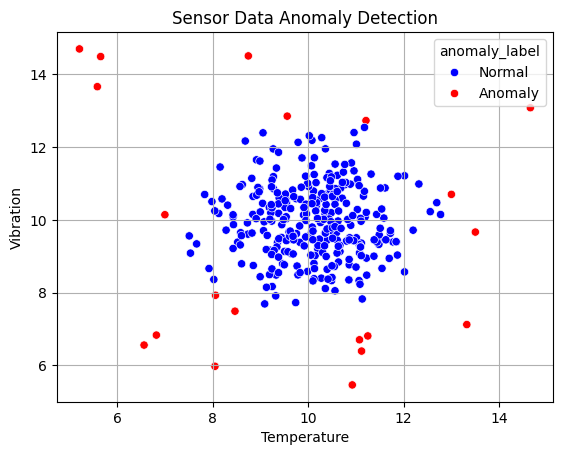

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

# Step 2: Generate Sample Sensor Data (You can replace this with your own dataset)
def generate_sensor_data(n_samples=300, n_anomalies=20):
    # Normal sensor data
    X_normal, _ = make_blobs(n_samples=n_samples, centers=[[10, 10]], cluster_std=1.0)
    
    # Anomalous sensor data
    rng = np.random.RandomState(42)
    X_anomalies = rng.uniform(low=5, high=15, size=(n_anomalies, 2))
    
    X = np.vstack((X_normal, X_anomalies))
    df = pd.DataFrame(X, columns=["temperature", "vibration"])
    return df

# Step 3: Feature Selection
def select_features(df):
    return df[["temperature", "vibration"]]

# Step 4: Apply Isolation Forest
def apply_isolation_forest(features):
    model = IsolationForest(n_estimators=100, contamination=0.06, random_state=42)
    model.fit(features)
    predictions = model.predict(features)
    return predictions

# Step 5: Visualize Results
def plot_results(df, predictions):
    df["anomaly"] = predictions
    df["anomaly_label"] = df["anomaly"].map({1: "Normal", -1: "Anomaly"})
    
    sns.scatterplot(
        data=df,
        x="temperature",
        y="vibration",
        hue="anomaly_label",
        palette={"Normal": "blue", "Anomaly": "red"}
    )
    plt.title("Sensor Data Anomaly Detection")
    plt.xlabel("Temperature")
    plt.ylabel("Vibration")
    plt.grid(True)
    plt.show()

# Execute the full pipeline
if __name__ == "__main__":
    df = generate_sensor_data()
    features = select_features(df)
    predictions = apply_isolation_forest(features)
    plot_results(df, predictions)
